In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
import snsims

In [5]:
from snsims import SersicSamples

In [6]:
print(snsims.__version__)

1.2.11


In [7]:
from joinSNCat import DC2SN

In [8]:
from astropy.cosmology import FlatLambdaCDM

In [9]:
DC2 = FlatLambdaCDM(H0=71, Om0=0.265, Ob0=0.0448)

### Hostless SN and SN hosted in galaxies

In [10]:
#galaxy file name (contains galaxies with data from the rotated reference catalog and the gcr)
galfilename = '/Users/rbiswas/data/LSST/DC2/protoDC2_rotated_combined.hdf'

In [11]:
galsdf = pd.read_hdf(galfilename)

In [12]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1),
                             alpha=2.6e-5,
                             fieldArea=25,
                             surveyDuration=10.,
                             cosmo=DC2,
                             zbinEdges=np.arange(0.001, 1.4, 0.02))

In [13]:
snPop = snsims.GMM_SALT2Params(numSN=None, zSamples=zdist.zSamples, rng=np.random.RandomState(2),
                               mjdmin=59580, cosmo=DC2, surveyDuration=10.)

In [14]:
sn = DC2SN(galsdf, snPop)

## Trivial to separate out the Hostless SN

In [15]:
sn.hostless_snparams.head()#to_csv('MainSurveyHostless.csv')

/Users/rbiswas/doc/projects/DESC/DC2_Repo/scripts/TransientSimulation/joinSNCat.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._hostlessSN['snra'] = ra
/Users/rbiswas/doc/projects/DESC/DC2_Repo/scripts/TransientSimulation/joinSNCat.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._hostlessSN['sndec'] = dec


,c,mB,snid,t0,x0,x1,z,rand_host,snra,sndec
1,0.172012,-18.569077,1,59674.630746,0.000798,-0.054143,0.052377,0.946963,54.649110,-30.301250
15,-0.080591,-19.504568,15,62446.473290,0.001310,1.187385,0.062331,0.978427,56.165622,-30.706847
24,-0.039716,-19.504318,24,60044.133897,0.000533,-0.444216,0.095701,0.942166,52.564572,-28.220503
49,0.050246,-19.005217,49,63061.159128,0.000206,1.559529,0.119959,0.955740,54.075663,-27.458988
50,-0.033819,-19.108485,50,61566.359785,0.000236,1.588702,0.117542,0.901602,53.297779,-30.869266


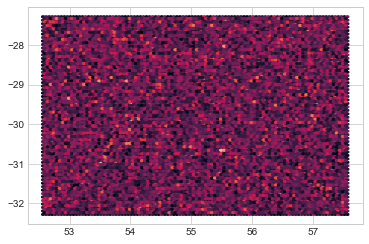

In [17]:
fig, ax = plt.subplots()
ax.hexbin(sn.hostless_snparams.snra, sn.hostless_snparams.sndec)

In [18]:
sn.hostless_snparams.to_csv('hostless_MainSurvey.csv', index=False, sep=' ')

In [19]:
!head hostless_MainSurvey.csv

c mB snid t0 x0 x1 z rand_host snra sndec
0.17201192728930964 -18.569077425266595 1 59674.6307461718 0.0007984237174529296 -0.05414271128104475 0.05237702874172963 0.9469626038148141 54.64911002351287 -30.30125013678121
-0.08059065866666743 -19.504568100715098 15 62446.473289530855 0.001310149317862862 1.187385338702093 0.0623307296270823 0.9784269160148309 56.165622467210795 -30.706846688466907
-0.0397163729463925 -19.504318434801572 24 60044.13389670966 0.000533074043753483 -0.44421595402292724 0.0957013192657734 0.9421662328554996 52.564571874086724 -28.22050254815369
0.050246148976101725 -19.00521716694905 49 63061.159128348765 0.00020560398083412646 1.559528542612974 0.11995940422435361 0.9557398410881859 54.0756628631592 -27.458987562520367
-0.033818559527357045 -19.108485203262273 50 61566.359784540575 0.00023627047758509022 1.5887020340786862 0.11754230942341465 0.9016021928073807 53.297779454085564 -30.869265882832703
-0.060280260302441116 -19.304852749584278 60 62500.94298163

In [20]:
!wc -l hostless_MainSurvey.csv

   43202 hostless_MainSurvey.csv


In [21]:
MainSurveyMapper, hostedSNParams = sn.assignHosts()

/Users/rbiswas/doc/projects/DESC/DC2_Repo/scripts/TransientSimulation/joinSNCat.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.hostedSN['zbin'] = self.hostedSN.z // binwidth
/Users/rbiswas/doc/projects/DESC/DC2_Repo/scripts/TransientSimulation/joinSNCat.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.hostedSN['zbin'] = self.hostedSN.zbin.astype(np.int)
/Users/rbiswas/doc/projects/DESC/DC2_Repo/scripts/TransientSimulation/joinSNCat.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Index(['snid'], dtype='object')


In [22]:
MainSurveyMapper.head()

,galaxy_id
snid,
0,1178320
2,3632617
4,3633074
3,19727499
5,327936


In [23]:
hostedSNParams.columns

Index(['c', 'mB', 't0', 'x0', 'x1', 'rand_host', 'zbin', 'diskMassStellar',
       'morphology/diskHalfLightRadiusArcsec',
       'morphology/diskMinorAxisArcsec', 'morphology/positionAngle',
       'morphology/spheroidHalfLightRadiusArcsec',
       'morphology/spheroidMinorAxisArcsec', 'size_bulge_true',
       'size_disk_true', 'totalMassStellar', 'uniqueId', 'raJ2000_gal',
       'decJ2000_gal', 'z', 'zbin_gals', 'snid'],
      dtype='object')

In [24]:
hostedSNParams.to_csv('MainhostGals.csv', sep=' ', index=True)

In [25]:
!head MainhostGals.csv

galaxy_id c mB t0 x0 x1 rand_host zbin diskMassStellar morphology/diskHalfLightRadiusArcsec morphology/diskMinorAxisArcsec morphology/positionAngle morphology/spheroidHalfLightRadiusArcsec morphology/spheroidMinorAxisArcsec size_bulge_true size_disk_true totalMassStellar uniqueId raJ2000_gal decJ2000_gal z zbin_gals snid
1178320 -0.09483514281864944 -19.54852743723045 61171.381392818315 0.005048026768388985 1.06194567391776 0.5172978838465893 1 0.03936157664967953 0.8672666587855546 0.35122826987844913 17.90592141684192 21.518908689872916 17.275086437564667 21.518908689872916 0.8672666587855546 187128876632.2581 1206599759 56.1996333 -29.84865434 0.03644061 1 0
3632617 -0.09149624591064995 -19.536882981732614 61586.26804425729 0.0024009506280210976 0.1698842952917602 0.7654597593969069 2 20924698578.94602 1.5837612573018676 1.4493098891190235 146.73732744459917 4.937439140743053 2.832455616642232 4.937439140743053 1.5837612573018676 74169796271.9285 3719799887 55.13965406 -25.71081281 

In [26]:
hostedSNParamsPos = sn.get_positions(hostedSNParams, np.random.RandomState(3))

In [27]:
hostedSNParamsPos.head()

,c,mB,t0,x0,x1,rand_host,zbin,diskMassStellar,morphology/diskHalfLightRadiusArcsec,morphology/diskMinorAxisArcsec,...,size_disk_true,totalMassStellar,uniqueId,raJ2000_gal,decJ2000_gal,z,zbin_gals,snid,snra,sndec
galaxy_id,,,,,,,,,,,,,,,,,,,,,
1178320,-0.094835,-19.548527,61171.381393,0.005048,1.061946,0.517298,1,3.936158e-02,0.867267,0.351228,...,0.867267,1.871289e+11,1206599759,56.199633,-29.848654,0.036441,1,0,56.202971,-29.849740
3632617,-0.091496,-19.536883,61586.268044,0.002401,0.169884,0.765460,2,2.092470e+10,1.583761,1.449310,...,1.583761,7.416980e+10,3719799887,55.139654,-25.710813,0.043831,2,2,55.149288,-25.696153
19727499,-0.100534,-18.899228,61168.926733,0.000799,-1.739647,0.282396,3,2.014596e+10,3.664438,1.538071,...,3.664438,3.876318e+10,20200959055,53.361486,-25.525316,0.068660,3,3,53.361210,-25.525607
3633074,0.236445,-18.495777,61114.342478,0.000740,-0.423386,0.221045,2,8.994103e+08,4.995782,1.908076,...,4.995782,1.840858e+10,3720267855,57.880350,-25.652590,0.042927,2,4,57.876968,-25.649880
327936,-0.058559,-19.227136,60785.722097,0.000835,-0.417339,0.686222,3,9.109745e+08,3.192573,1.836082,...,3.192573,1.093574e+09,335806543,55.058266,-29.000093,0.076627,3,5,55.058812,-29.000142


In [28]:
hostedSNParamsPos.to_csv('MainSurveyHostedSNPositions.csv', sep=' ', index=True)

In [29]:
!head MainSurveyHostedSNPositions.csv

galaxy_id c mB t0 x0 x1 rand_host zbin diskMassStellar morphology/diskHalfLightRadiusArcsec morphology/diskMinorAxisArcsec morphology/positionAngle morphology/spheroidHalfLightRadiusArcsec morphology/spheroidMinorAxisArcsec size_bulge_true size_disk_true totalMassStellar uniqueId raJ2000_gal decJ2000_gal z zbin_gals snid snra sndec
1178320 -0.09483514281864944 -19.54852743723045 61171.381392818315 0.005048026768388985 1.06194567391776 0.5172978838465893 1 0.03936157664967953 0.8672666587855546 0.35122826987844913 17.90592141684192 21.518908689872916 17.275086437564667 21.518908689872916 0.8672666587855546 187128876632.2581 1206599759 56.1996333 -29.84865434 0.03644061 1 0 56.202971284220986 -29.849739661248986
3632617 -0.09149624591064995 -19.536882981732614 61586.26804425729 0.0024009506280210976 0.1698842952917602 0.7654597593969069 2 20924698578.94602 1.5837612573018676 1.4493098891190235 146.73732744459917 4.937439140743053 2.832455616642232 4.937439140743053 1.5837612573018676 741

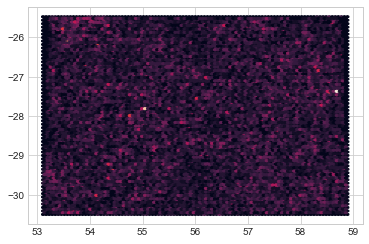

In [30]:
fig, ax = plt.subplots()
ax.hexbin(hostedSNParamsPos.snra, hostedSNParamsPos.sndec)